<a href="https://colab.research.google.com/github/deepakboharachhetri/AI_lab/blob/main/perceptron_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Training 2-input AND gate ===
Epoch 1: weights=[0. 0.], bias=0.0
Epoch 2: weights=[0.1 0.1], bias=0.0
Epoch 3: weights=[0.2 0.1], bias=-0.1
Epoch 4: weights=[0.2 0.1], bias=-0.20000000000000004
Converged!
Final weights: [0.2 0.1], bias: -0.20000000000000004
Accuracy: 100.00%

=== Training 2-input OR gate ===
Epoch 1: weights=[0. 0.], bias=0.0
Epoch 2: weights=[0.  0.1], bias=0.0
Epoch 3: weights=[0.1 0.1], bias=0.0
Epoch 4: weights=[0.1 0.1], bias=-0.1
Converged!
Final weights: [0.1 0.1], bias: -0.1
Accuracy: 100.00%

=== Training 3-input AND gate ===
Epoch 1: weights=[0. 0. 0.], bias=0.0
Epoch 2: weights=[0.1 0.1 0.1], bias=0.0
Epoch 3: weights=[0.1 0.1 0.1], bias=-0.20000000000000004
Converged!
Final weights: [0.1 0.1 0.1], bias: -0.20000000000000004
Accuracy: 100.00%

=== Training 3-input OR gate ===
Epoch 1: weights=[0. 0. 0.], bias=0.0
Epoch 2: weights=[0.  0.  0.1], bias=0.0
Epoch 3: weights=[0.  0.1 0.1], bias=0.0
Epoch 4: weights=[0.1 0.1 0.1], bias=0.0
Epoch 5: weights=[0.

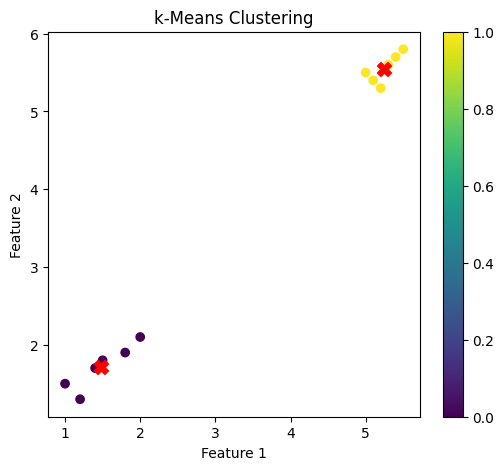

=== k-Means Clustering for arbitrary features, k=3 ===
Iteration 1: Centroids updated
Converged at iteration 2
Final WCSS: 4.7567


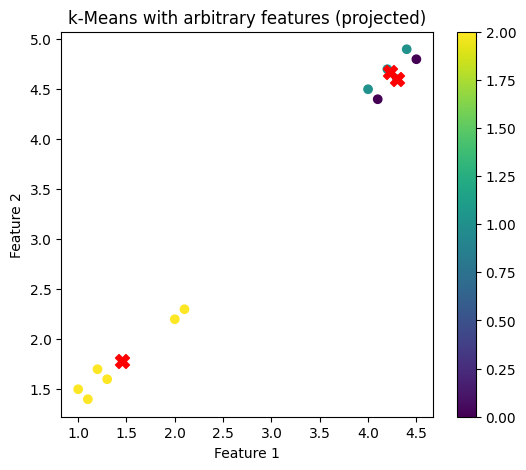

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# =====================
# Perceptron Implementation
# =====================

def step_activation(x):
    return 1 if x >= 0 else 0

def linear_activation(x):
    return x  # identity for regression

# Train perceptron for logical gates (2-input AND/OR)
def train_perceptron_logical_gate(inputs, targets, learning_rate=0.1, max_epochs=100):
    n_features = inputs.shape[1]
    weights = np.zeros(n_features)
    bias = 0.0

    for epoch in range(max_epochs):
        errors = 0
        print(f"Epoch {epoch+1}: weights={weights}, bias={bias}")
        for x, target in zip(inputs, targets):
            weighted_sum = np.dot(weights, x) + bias
            output = step_activation(weighted_sum)
            error = target - output
            if error != 0:
                errors += 1
                weights += learning_rate * error * x
                bias += learning_rate * error
        if errors == 0:
            print("Converged!")
            break
    # Calculate accuracy
    predictions = [step_activation(np.dot(weights, x) + bias) for x in inputs]
    accuracy = np.mean(predictions == targets)
    print(f"Final weights: {weights}, bias: {bias}")
    print(f"Accuracy: {accuracy*100:.2f}%\n")
    return weights, bias, accuracy

def generate_truth_table(n):
    from itertools import product
    return np.array(list(product([0,1], repeat=n)))

def targets_for_gate(inputs, gate='AND'):
    if gate == 'AND':
        return np.prod(inputs, axis=1)
    elif gate == 'OR':
        return np.clip(np.sum(inputs, axis=1), 0, 1)
    else:
        raise ValueError("Gate must be 'AND' or 'OR'")

def test_logical_gates():
    print("=== Training 2-input AND gate ===")
    inputs = generate_truth_table(2)
    targets = targets_for_gate(inputs, 'AND')
    train_perceptron_logical_gate(inputs, targets)

    print("=== Training 2-input OR gate ===")
    targets = targets_for_gate(inputs, 'OR')
    train_perceptron_logical_gate(inputs, targets)

def train_perceptron_n_input_gate(n, gate='AND'):
    print(f"=== Training {n}-input {gate} gate ===")
    inputs = generate_truth_table(n)
    targets = targets_for_gate(inputs, gate)
    weights, bias, acc = train_perceptron_logical_gate(inputs, targets)
    return weights, bias, acc

def test_n_input_gates():
    for n in [3,4]:
        for gate in ['AND', 'OR']:
            train_perceptron_n_input_gate(n, gate)

# =====================
# Perceptron for Linear Function with 3 features
# =====================

def generate_linear_data_3_features(samples=10):
    np.random.seed(0)
    X = np.random.rand(samples, 3)
    # True function: y = 2*x1 + 3*x2 - x3 + 5
    y = 2*X[:,0] + 3*X[:,1] - 1*X[:,2] + 5
    return X, y

def train_perceptron_linear(X, y, learning_rate=0.01, max_epochs=100):
    n_features = X.shape[1]
    weights = np.zeros(n_features)
    bias = 0.0
    for epoch in range(max_epochs):
        predictions = np.dot(X, weights) + bias
        errors = y - predictions
        mse = np.mean(errors**2)
        print(f"Epoch {epoch+1}: MSE={mse:.4f}")
        # Gradient descent update
        weights += learning_rate * 2 * np.dot(errors, X) / len(y)
        bias += learning_rate * 2 * np.mean(errors)
    print(f"Final weights: {weights}, bias: {bias}\n")
    return weights, bias

def test_linear_function_3_features():
    print("=== Training Perceptron for Linear function with 3 features ===")
    X, y = generate_linear_data_3_features()
    train_perceptron_linear(X, y)

# =====================
# Perceptron for Linear Function with n features
# =====================

def generate_linear_data_n_features(n, samples=10):
    np.random.seed(0)
    X = np.random.rand(samples, n)
    weights_true = np.random.uniform(-1, 1, size=n)
    bias_true = 5
    y = np.dot(X, weights_true) + bias_true
    print(f"True weights: {weights_true}, bias: {bias_true}")
    return X, y

def test_linear_function_n_features():
    for n in [4,5]:
        print(f"=== Training Perceptron for Linear function with {n} features ===")
        X, y = generate_linear_data_n_features(n)
        train_perceptron_linear(X, y)

# =====================
# k-Means Clustering
# =====================

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, c) for c in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        points = X[clusters == i]
        if len(points) == 0:
            # If no points assigned to cluster, reinitialize randomly
            new_centroids.append(X[random.randint(0, len(X)-1)])
        else:
            new_centroids.append(points.mean(axis=0))
    return np.array(new_centroids)

def compute_wcss(X, clusters, centroids):
    wcss = 0
    for i, centroid in enumerate(centroids):
        points = X[clusters == i]
        wcss += np.sum((points - centroid)**2)
    return wcss

def kmeans(X, k, max_iter=100, verbose=True):
    centroids = initialize_centroids(X, k)
    for i in range(max_iter):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.allclose(centroids, new_centroids):
            if verbose:
                print(f"Converged at iteration {i+1}")
            break
        centroids = new_centroids
        if verbose:
            print(f"Iteration {i+1}: Centroids updated")
    wcss = compute_wcss(X, clusters, centroids)
    if verbose:
        print(f"Final WCSS: {wcss:.4f}")
    return clusters, centroids, wcss

def plot_clusters_2d(X, clusters, centroids, title="k-Means Clustering"):
    plt.figure(figsize=(6,5))
    scatter = plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis')
    plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='X', s=100)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(scatter)
    plt.show()

def test_kmeans_2_features():
    print("=== k-Means Clustering for 2 features, k=2 ===")
    X = np.array([
        [1.0,1.5],
        [1.5,1.8],
        [1.2,1.3],
        [1.4,1.7],
        [5.0,5.5],
        [5.5,5.8],
        [5.2,5.3],
        [5.4,5.7],
        [2.0,2.1],
        [1.8,1.9],
        [5.1,5.4],
        [5.3,5.6]
    ])
    clusters, centroids, wcss = kmeans(X, 2)
    plot_clusters_2d(X, clusters, centroids)

def test_kmeans_arbitrary_features():
    print("=== k-Means Clustering for arbitrary features, k=3 ===")
    X = np.array([
        [1.0,1.5,0.8,1.2],
        [1.2,1.7,0.9,1.1],
        [1.1,1.4,0.7,1.3],
        [1.3,1.6,0.85,1.15],
        [4.0,4.5,3.8,4.2],
        [4.2,4.7,3.9,4.1],
        [4.1,4.4,3.7,4.3],
        [4.3,4.6,3.85,4.15],
        [2.0,2.2,1.8,2.1],
        [2.1,2.3,1.9,2.0],
        [4.5,4.8,4.0,4.4],
        [4.4,4.9,3.95,4.35]
    ])
    k = 3
    clusters, centroids, wcss = kmeans(X, k)
    # For visualization, project on first two features
    plot_clusters_2d(X[:, :2], clusters, centroids[:, :2], title="k-Means with arbitrary features (projected)")

# =====================
# Main: Run all tests
# =====================

def main():
    # Logical gates 2-input
    test_logical_gates()

    # Logical gates n-input
    test_n_input_gates()

    # Linear function with 3 features
    test_linear_function_3_features()

    # Linear function with n features
    test_linear_function_n_features()

    # k-Means 2 features k=2
    test_kmeans_2_features()

    # k-Means arbitrary features k=3
    test_kmeans_arbitrary_features()

if __name__ == "__main__":
    main()
